In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import keras
from keras import layers


# Chargement des données d'entraînement
import numpy as np
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

IMAGE_SIZE = (150, 150)
# Chargement des données d'entraînement
def load_data():
    datasets = ['C:\\Users\\etern\\Documents\\PROJET_CNN_JB_1\\seg_train\\seg_train', 'C:\\Users\\etern\\Documents\\PROJET_CNN_JB_1\\seg_test\\seg_test']

    output = []
    #
    class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
    class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
    nb_classes = len(class_names)




#TRANSFORMATION image matric + label en vector one-hot
    for dataset in datasets:
        images = []
        labels = []
        print("Loading {}".format(dataset))

        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                images.append(image/255)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        labels = tf.keras.utils.to_categorical(labels, nb_classes)  # Convert labels to one-hot vectors

        output.append((images, labels))

    return output

In [2]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\etern\Documents\PROJET_CNN_JB_1\seg_train\seg_train


100%|████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:01<00:00, 1191.09it/s]


Loading C:\Users\etern\Documents\PROJET_CNN_JB_1\seg_test\seg_test


100%|██████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 1260.16it/s]


# Model

In [3]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

input_shape = (150, 150, 3)
model = keras.Sequential(
    [
        
        layers.Conv2D(32, 3, input_shape = input_shape, activation='relu', padding="same", strides=1),
        layers.Conv2D(32, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Conv2D(128, 3, activation='relu', padding="same", strides=1),
        layers.Conv2D(128, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.Conv2D(64, 3, activation='relu', padding="same", strides=1),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        layers.Reshape([-1]),
        layers.Dense(16, activation="relu"),
        layers.Dense(6, activation="softmax"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics='accuracy',
                       )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

# Training

In [6]:
hist = model.fit(x=train_images, y=train_labels, epochs=10, batch_size=20, validation_data=(test_images, test_labels))

Epoch 1/10
702/702 [==============================] - 456s 648ms/step - loss: 1.0607 - accuracy: 0.5703 - val_loss: 0.8147 - val_accuracy: 0.6547
Epoch 2/10
702/702 [==============================] - 472s 673ms/step - loss: 0.7421 - accuracy: 0.7170 - val_loss: 0.6322 - val_accuracy: 0.7617
Epoch 3/10
702/702 [==============================] - 460s 655ms/step - loss: 0.6171 - accuracy: 0.7716 - val_loss: 0.6141 - val_accuracy: 0.7713
Epoch 4/10
702/702 [==============================] - 442s 630ms/step - loss: 0.5279 - accuracy: 0.8092 - val_loss: 0.5490 - val_accuracy: 0.8017
Epoch 5/10
702/702 [==============================] - 436s 621ms/step - loss: 0.4695 - accuracy: 0.8325 - val_loss: 0.5175 - val_accuracy: 0.8023
Epoch 6/10
702/702 [==============================] - 416s 593ms/step - loss: 0.4196 - accuracy: 0.8492 - val_loss: 0.4892 - val_accuracy: 0.8267
Epoch 7/10
702/702 [==============================] - 433s 616ms/step - loss: 0.3655 - accuracy: 0.8693 - val_loss: 0.5351 -

In [7]:
validation_data = (test_images, test_labels)
hist = model.fit(x=train_images, y=train_labels, epochs=10, batch_size=16, validation_data=validation_data)

Epoch 1/10
878/878 [==============================] - 453s 516ms/step - loss: 0.2633 - accuracy: 0.9040 - val_loss: 0.5425 - val_accuracy: 0.8253
Epoch 2/10
878/878 [==============================] - 388s 441ms/step - loss: 0.2157 - accuracy: 0.9250 - val_loss: 0.6402 - val_accuracy: 0.8047
Epoch 3/10
878/878 [==============================] - 385s 438ms/step - loss: 0.2002 - accuracy: 0.9283 - val_loss: 0.6706 - val_accuracy: 0.8083
Epoch 4/10
878/878 [==============================] - 384s 437ms/step - loss: 0.1597 - accuracy: 0.9437 - val_loss: 0.6967 - val_accuracy: 0.8117
Epoch 5/10
878/878 [==============================] - 382s 435ms/step - loss: 0.1696 - accuracy: 0.9403 - val_loss: 0.7706 - val_accuracy: 0.8163
Epoch 6/10
878/878 [==============================] - 413s 471ms/step - loss: 0.1438 - accuracy: 0.9500 - val_loss: 0.7107 - val_accuracy: 0.8197
Epoch 7/10
878/878 [==============================] - 430s 490ms/step - loss: 0.1461 - accuracy: 0.9495 - val_loss: 0.8080 -

# Results

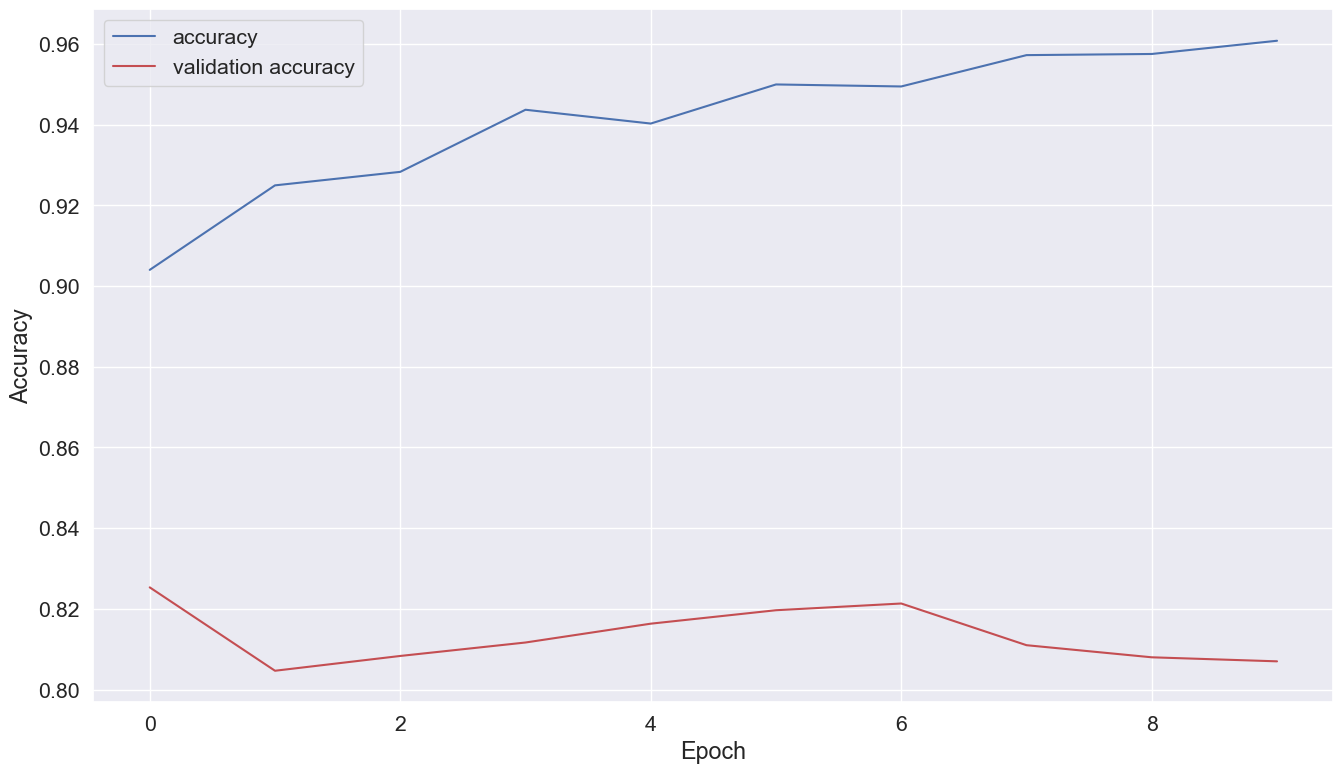

In [8]:
plt.figure(figsize=(16,9))
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
plt.plot(accuracy, c='b', label="accuracy")
plt.plot(val_accuracy, c='r', label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


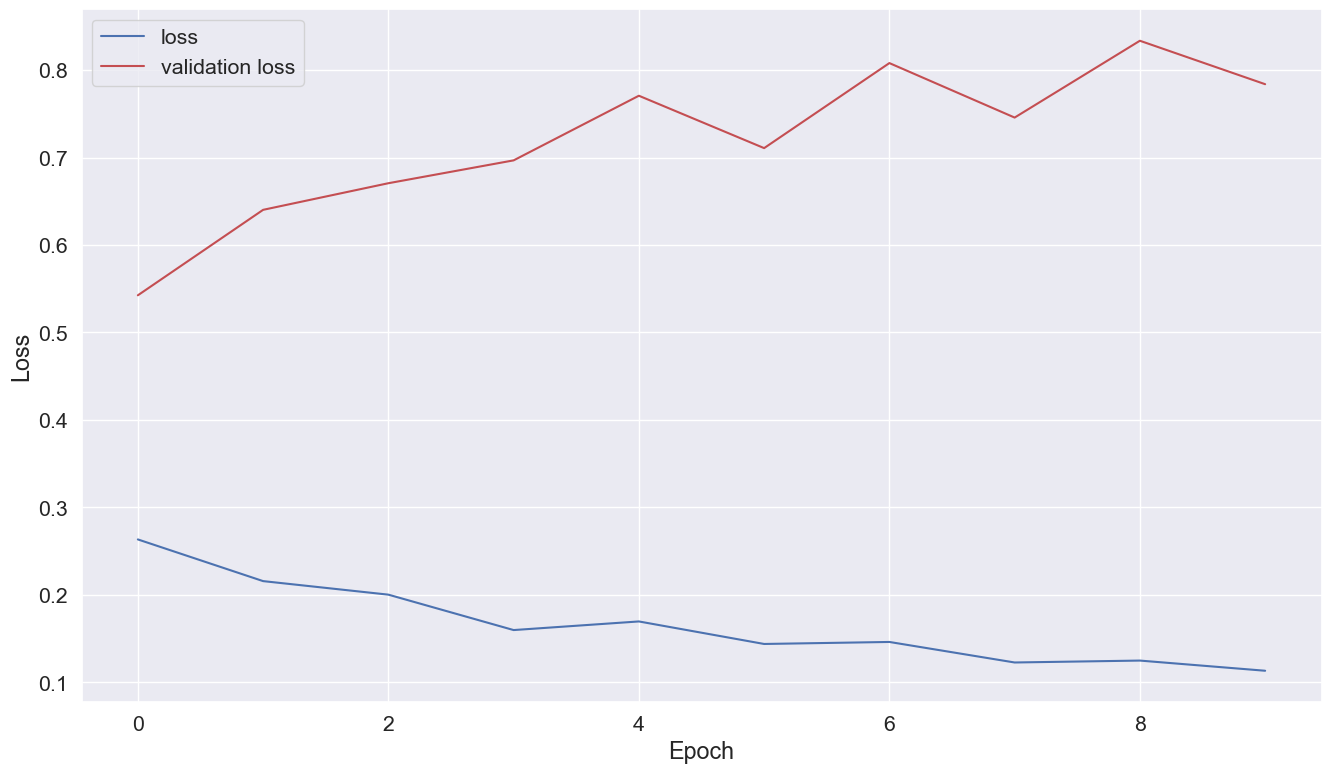

In [9]:
plt.figure(figsize=(16,9))
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss, c='b', label="loss")
plt.plot(val_loss, c='r', label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

94/94 [==============================] - 15s 158ms/step


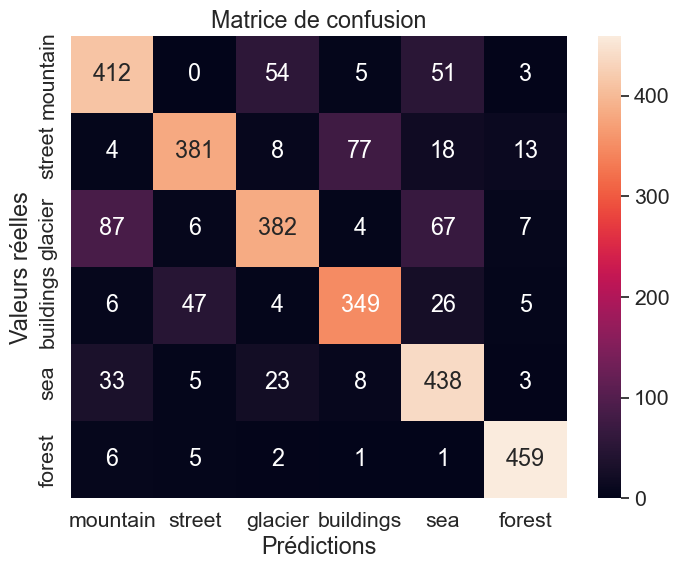

In [10]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)

classes = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()